<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20II%20%3A%20Business%20Applications/Chapter%2012%3A%20CRM%20%26%20Marketing%20Analytics/12_5_Complaint_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CRM & Marketing Analytics**
## Complaint Analysis

[Dataset](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews): from Kaggle

## Importing Required Libraries for Analysis and Prediction

In [ ]:
#Required general libraries are imported
import os
import csv
import numpy as np
import pandas as pd
from sklearn import metrics

#Required dataset pre-processing libraries are imported
from sklearn.preprocessing import LabelEncoder
from textblob import *

#Required text pre-processing libraries are imported
import nltk
import re

# download the stopwords and wordnet corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
# import word_tokenize from nltk library
from nltk.tokenize import word_tokenize
# import WordNetLemmatizer from nltk library
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import CountVectorizer

#Required data visualisation libraries are imported
import plotly.express as px

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from sklearn.metrics import roc_curve, auc

#Required prediction modelling libraries are imported
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# disable chained assignments
pd.options.mode.chained_assignment = None 

## Upload the Dataset

In [ ]:
# Import Data

url="https://drive.google.com/file/d/1UIlZ0fgbVdTgi0dMAa4LtY_NwKdzb7nZ/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
complaint_df = pd.read_csv(path) 
print(complaint_df)

       Unnamed: 0  Clothing ID  Age  ...   Division Name Department Name  Class Name
0               0          767   33  ...       Initmates        Intimate   Intimates
1               1         1080   34  ...         General         Dresses     Dresses
2               2         1077   60  ...         General         Dresses     Dresses
3               3         1049   50  ...  General Petite         Bottoms       Pants
4               4          847   47  ...         General            Tops     Blouses
...           ...          ...  ...  ...             ...             ...         ...
23481       23481         1104   34  ...  General Petite         Dresses     Dresses
23482       23482          862   48  ...  General Petite            Tops       Knits
23483       23483         1104   31  ...  General Petite         Dresses     Dresses
23484       23484         1084   28  ...         General         Dresses     Dresses
23485       23485         1104   52  ...  General Petite         

In [ ]:
#Inspect the first 5 examples from dataset
complaint_df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Dataset Pre-processing

##### Understanding the dataset logic, controlling the data format, rearranging features and determination of the features for prediction model 

In [ ]:
#Checking the dataframe shape
complaint_df.shape

(23486, 11)

In [ ]:
#Required variables headers are prepared for modelling
complaint_df1 = complaint_df.rename(columns={'Review Text': 'ReviewText', 'Recommended IND': 'RecommendedIND', 'Class Name': 'ClassName'})
complaint_df1.head()

,Unnamed: 0,Clothing ID,Age,Title,ReviewText,Rating,RecommendedIND,Positive Feedback Count,Division Name,Department Name,ClassName
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
complaint_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   ReviewText               22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   RecommendedIND           23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  ClassName                23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
#Uncessary features that are eliminated from dataset for prediction 
complaint_df2=complaint_df1[['ReviewText', 'Rating', 'RecommendedIND', 'ClassName']]

In [ ]:
# Determine features with missing values
complaint_df2.isnull().sum()

ReviewText        845
Rating              0
RecommendedIND      0
ClassName          14
dtype: int64

In [ ]:
# Missing values analysis
complaint_df2.isnull().sum()/len(complaint_df2)*100

ReviewText        3.597888
Rating            0.000000
RecommendedIND    0.000000
ClassName         0.059610
dtype: float64

In [ ]:
#Removing rows with missing values for 'Review Text'
#Note: ClassName also has missing values. However since this variable is not be used in prediction, it is ignored.
complaint_df3 = complaint_df2.dropna(axis=0, how='any', subset=['ReviewText', 'ClassName'])

In [ ]:
#Analysing the text lenght according to RecommendedIND (Target)
grouped_reccommendind = complaint_df3.groupby('RecommendedIND').agg({'ReviewText': ['count']})
print(grouped_reccommendind)

               ReviewText
                    count
RecommendedIND           
0                    4101
1                   18527


In [ ]:
#New variable for free text lenght
complaint_df3['TextLen']=complaint_df3['ReviewText'].str.len()

complaint_df3.head()

,ReviewText,Rating,RecommendedIND,ClassName,TextLen
0,Absolutely wonderful - silky and sexy and comf...,4,1,Intimates,53
1,Love this dress! it's sooo pretty. i happene...,5,1,Dresses,303
2,I had such high hopes for this dress and reall...,3,0,Dresses,500
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,Pants,124
4,This shirt is very flattering to all due to th...,5,1,Blouses,192


In [ ]:
#Analysing the text lenght according to RecommendedIND (Target)
grouped_reccommendind1 = complaint_df3.groupby('RecommendedIND').agg({'TextLen': ['mean', 'min', 'max']})
print(grouped_reccommendind1)

                   TextLen         
                      mean min  max
RecommendedIND                     
0               318.334065  20  508
1               306.642630   9  508


In [ ]:
# Boxplot to visualize the pattern in length for recommendation indicator
fig1 = px.box(complaint_df3, x="RecommendedIND", y="TextLen", color="RecommendedIND",
             color_discrete_sequence=["orange", "blue"])
fig1.show()

In [ ]:
# Histogram to analyse the distribution of review ratings in dataset
fig2 = px.histogram(complaint_df3, y="Rating", orientation='h', 
                    color_discrete_sequence=['orange'],)
fig2.update_yaxes(type='category')
fig2.show()

In [ ]:
# Histogram to analyse distribution of recommendation flag (Target) of reviews in dataset
fig3 = px.histogram(complaint_df3, y="RecommendedIND", orientation='h', 
                    color_discrete_sequence=['orange'])
fig3.update_yaxes(type='category')
fig3.show()

In [ ]:
# Histogram to analyse the distribution of product classes of reviews in Dataset
fig4 = px.histogram(complaint_df3, y="ClassName", orientation='h', 
                    color_discrete_sequence=['orange'])
fig4.show()

In [ ]:
# Histogram to analyse the distribution of product classes according to recommendation indicator
fig5 = px.histogram(complaint_df3, 
            x="ClassName", 
            y="RecommendedIND", 
            color="RecommendedIND", 
            barmode="overlay",
            histnorm ='percent',
            color_discrete_sequence=["orange", "blue"],
            title=f"Recommendation Distribution According to Clothing Classes")
fig5.update_layout(yaxis={"ticksuffix":"%"})
fig5.update_layout(yaxis_title="Percentage")
fig5.update_xaxes(type='category')
fig5.show()

In [ ]:
fig6 = px.histogram(complaint_df3, 
            x="Rating", 
            y="RecommendedIND", 
            color="RecommendedIND", 
            barmode="overlay",
            histnorm='percent',
            color_discrete_sequence=["orange", "blue"],
            title=f"Recommendation Distribution According to Ratings")
fig6.update_layout(yaxis={"ticksuffix":"%"})
fig6.update_layout(yaxis_title="Percentage")
fig6.update_xaxes(type='category')
fig6.show()

In [ ]:
#Analysing Rating feature values in detail
complaint_df3[(complaint_df3['Rating'] == 3)].sample(5)

,ReviewText,Rating,RecommendedIND,ClassName,TextLen
8482,I bought this top in black n moss. they are of...,3,1,Knits,384
1680,I have been eyeing this piece for months now! ...,3,0,Intimates,500
3011,"This is a cute, flattering dress, however the ...",3,1,Dresses,500
19353,I'm a pretty solid 10 these days (and had no t...,3,0,Dresses,387
8324,I read the reviews and everyone loved them so ...,3,0,Pants,185


In [ ]:
#Eliminate abstainer comments that have Rating=3, may cause contradictions on recommendation indicator (Target). 
complaint_df4=complaint_df3[(complaint_df3['Rating'] != 3)]

In [ ]:
fig7 = px.histogram(complaint_df4, 
            x="Rating", 
            y="RecommendedIND", 
            color="RecommendedIND", 
            barmode="overlay",
            histnorm='percent',
            color_discrete_sequence=["orange", "blue"],
            title=f"Recommendation-Rating Relation")
fig7.update_layout(yaxis_title="Percentage")
fig7.update_layout(yaxis={"ticksuffix":"%"})
fig7.update_xaxes(type='category')
fig7.show()

POLARITY CALCULATION

In [ ]:
complaint_df4['ReviewText_Polarity'] = complaint_df4['ReviewText'].map(lambda text: TextBlob(text).sentiment.polarity)

In [ ]:
complaint_df4

,ReviewText,Rating,RecommendedIND,ClassName,TextLen,ReviewText_Polarity
0,Absolutely wonderful - silky and sexy and comf...,4,1,Intimates,53,0.633333
1,Love this dress! it's sooo pretty. i happene...,5,1,Dresses,303,0.339583
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,Pants,124,0.550000
4,This shirt is very flattering to all due to th...,5,1,Blouses,192,0.512891
5,"I love tracy reese dresses, but this one is no...",2,0,Dresses,488,0.178750
...,...,...,...,...,...,...
23477,I'm so impressed with the beautiful color comb...,4,1,Dresses,500,0.156494
23478,I was surprised at the positive reviews for th...,1,0,Dresses,229,-0.078788
23479,So i wasn't sure about ordering this skirt bec...,5,1,Skirts,500,0.211136
23481,I was very happy to snag this dress at such a ...,5,1,Dresses,131,0.552667


In [ ]:
#Distribution of reviews' calculated polarity 
px.histogram(complaint_df4, x = 'ReviewText_Polarity', color_discrete_sequence=['orange'])

In [ ]:
#Determine the threshold for calculated polarity to catagorize reviews as negative and positive.
complaint_df4['Sentiment']=''
complaint_df4.loc[complaint_df4['ReviewText_Polarity']>=0,'Sentiment']='Positive'
complaint_df4.loc[complaint_df4['ReviewText_Polarity']<0,'Sentiment']='Negative'

In [ ]:
complaint_df4.head()

,ReviewText,Rating,RecommendedIND,ClassName,TextLen,ReviewText_Polarity,Sentiment
0,Absolutely wonderful - silky and sexy and comf...,4,1,Intimates,53,0.633333,Positive
1,Love this dress! it's sooo pretty. i happene...,5,1,Dresses,303,0.339583,Positive
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,Pants,124,0.550000,Positive
4,This shirt is very flattering to all due to th...,5,1,Blouses,192,0.512891,Positive
5,"I love tracy reese dresses, but this one is no...",2,0,Dresses,488,0.178750,Positive


In [ ]:
fig8 = px.histogram(complaint_df4, 
            x="Sentiment", 
            y="RecommendedIND", 
            color="RecommendedIND", 
            barmode="overlay",
            histnorm='percent',
            color_discrete_sequence=["orange", "blue"],
            title=f"Recommendation-Sentiment Relation")
fig8.update_layout(yaxis_title="Percentage")
fig8.update_xaxes(type='category')
fig8.update_layout(yaxis={"ticksuffix":"%"})
fig8.show()

## Review Text Preprocessing

In [ ]:
#Convert all texts to lowercase
complaint_df4["ReviewText"] = complaint_df4["ReviewText"].str.lower()

In [ ]:
#remove puncktiation
complaint_df4["ReviewText"] = complaint_df4["ReviewText"].str.replace('[^\w\s]', '')
complaint_df4.head()

,ReviewText,Rating,RecommendedIND,ClassName,TextLen,ReviewText_Polarity,Sentiment
0,absolutely wonderful silky and sexy and comfo...,4,1,Intimates,53,0.633333,Positive
1,love this dress its sooo pretty i happened t...,5,1,Dresses,303,0.339583,Positive
3,i love love love this jumpsuit its fun flirty ...,5,1,Pants,124,0.550000,Positive
4,this shirt is very flattering to all due to th...,5,1,Blouses,192,0.512891,Positive
5,i love tracy reese dresses but this one is not...,2,0,Dresses,488,0.178750,Positive


STOPWORDS, LEMMATIZATION

In [ ]:
#remove regular expressions

# write a regular expression to identify urls in text
url_regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

# write a regular expression to identify non-ascii characters in text
non_ascii_regex = r'[^\x00-\x7F]+'

In [ ]:
# Write a function to regular expression cleaning
def clean_regex(text_variable):
    
    # if text has urls, replace by token - urlplaceholder
    text_variable= re.sub(url_regex, 'urlplaceholder', text_variable)    
    
    # if text has non ascii characters, replace by a space
    text_variable=re.sub(non_ascii_regex, ' ', text_variable)

    return text_variable  


In [ ]:
#Control dataframe
complaint_df4["ReviewText1"] = np.vectorize(clean_regex)(complaint_df4["ReviewText"])
complaint_df4.head()

,ReviewText,Rating,RecommendedIND,ClassName,TextLen,ReviewText_Polarity,Sentiment,ReviewText1
0,absolutely wonderful silky and sexy and comfo...,4,1,Intimates,53,0.633333,Positive,absolutely wonderful silky and sexy and comfo...
1,love this dress its sooo pretty i happened t...,5,1,Dresses,303,0.339583,Positive,love this dress its sooo pretty i happened t...
3,i love love love this jumpsuit its fun flirty ...,5,1,Pants,124,0.550000,Positive,i love love love this jumpsuit its fun flirty ...
4,this shirt is very flattering to all due to th...,5,1,Blouses,192,0.512891,Positive,this shirt is very flattering to all due to th...
5,i love tracy reese dresses but this one is not...,2,0,Dresses,488,0.178750,Positive,i love tracy reese dresses but this one is not...


In [ ]:
# Remove stopwords
stop = stopwords.words('english')

complaint_df4['ReviewText2'] = complaint_df4['ReviewText1'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
complaint_df4.head()

,ReviewText,Rating,RecommendedIND,ClassName,TextLen,ReviewText_Polarity,Sentiment,ReviewText1,ReviewText2
0,absolutely wonderful silky and sexy and comfo...,4,1,Intimates,53,0.633333,Positive,absolutely wonderful silky and sexy and comfo...,absolutely wonderful silky sexy comfortable
1,love this dress its sooo pretty i happened t...,5,1,Dresses,303,0.339583,Positive,love this dress its sooo pretty i happened t...,love dress sooo pretty happened find store im ...
3,i love love love this jumpsuit its fun flirty ...,5,1,Pants,124,0.550000,Positive,i love love love this jumpsuit its fun flirty ...,love love love jumpsuit fun flirty fabulous ev...
4,this shirt is very flattering to all due to th...,5,1,Blouses,192,0.512891,Positive,this shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...
5,i love tracy reese dresses but this one is not...,2,0,Dresses,488,0.178750,Positive,i love tracy reese dresses but this one is not...,love tracy reese dresses one petite 5 feet tal...


In [ ]:
# Lemmatization & Stemming processes
lemmatizer = WordNetLemmatizer()

# Function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [ ]:
complaint_df4['ReviewText3'] = complaint_df4['ReviewText2'].apply(lemmatize_sentence) 

In [ ]:
complaint_df4.head()

,ReviewText,Rating,RecommendedIND,ClassName,TextLen,ReviewText_Polarity,Sentiment,ReviewText1,ReviewText2,ReviewText3
0,absolutely wonderful silky and sexy and comfo...,4,1,Intimates,53,0.633333,Positive,absolutely wonderful silky and sexy and comfo...,absolutely wonderful silky sexy comfortable,absolutely wonderful silky sexy comfortable
1,love this dress its sooo pretty i happened t...,5,1,Dresses,303,0.339583,Positive,love this dress its sooo pretty i happened t...,love dress sooo pretty happened find store im ...,love dress sooo pretty happen find store im gl...
3,i love love love this jumpsuit its fun flirty ...,5,1,Pants,124,0.550000,Positive,i love love love this jumpsuit its fun flirty ...,love love love jumpsuit fun flirty fabulous ev...,love love love jumpsuit fun flirty fabulous ev...
4,this shirt is very flattering to all due to th...,5,1,Blouses,192,0.512891,Positive,this shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...,shirt flatter due adjustable front tie perfect...
5,i love tracy reese dresses but this one is not...,2,0,Dresses,488,0.178750,Positive,i love tracy reese dresses but this one is not...,love tracy reese dresses one petite 5 feet tal...,love tracy reese dress one petite 5 foot tall ...


COMMON WORD & WORD CLOUD ANALYSIS

Common words and word cloud analysis are performed according to Recommendation Indicator (RecommendedIND) for the dataset. Reviews that are splitted into two part as positive with RecommendedIND=1 and negative with RecommendedIND=0.

The first word cloud indicates the most mentioned words in positive reviews. The second word cloud indicates the most mentioned words in negaive reviews. 

Hint!: The words are in the graph can change position when code is run repeatedly. However their font size remain the same according to the frequency of the word in the reviews.

In [ ]:
pos_df = complaint_df4[complaint_df4.RecommendedIND== 1]
neg_df = complaint_df4[complaint_df4.RecommendedIND== 0]
neg_df.head(3)

,ReviewText,Rating,RecommendedIND,ClassName,TextLen,ReviewText_Polarity,Sentiment,ReviewText1,ReviewText2,ReviewText3
5,i love tracy reese dresses but this one is not...,2,0,Dresses,488,0.178750,Positive,i love tracy reese dresses but this one is not...,love tracy reese dresses one petite 5 feet tal...,love tracy reese dress one petite 5 foot tall ...
22,first of all this is not pullover styling ther...,2,0,Dresses,437,-0.045595,Negative,first of all this is not pullover styling ther...,first pullover styling side zipper wouldnt pur...,first pullover style side zipper wouldnt purch...
26,i have been waiting for this sweater coat to s...,2,0,Sweaters,500,0.101818,Positive,i have been waiting for this sweater coat to s...,waiting sweater coat ship weeks excited arrive...,wait sweater coat ship week excite arrive coat...


In [ ]:
pos_words =[]
neg_words = []

for review in pos_df.ReviewText3:
    pos_words.append(review) 
pos_words = ' '.join(pos_words)


for review in neg_df.ReviewText3:
    neg_words.append(review)
neg_words = ' '.join(neg_words)


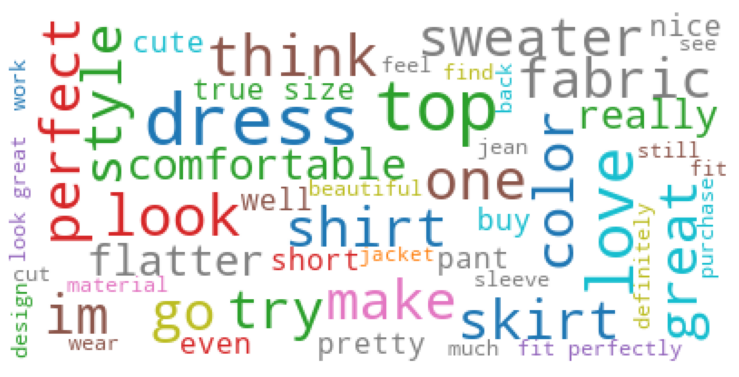

In [ ]:
wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=50,\
                      max_font_size=40, relative_scaling=.3, colormap="tab10").generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

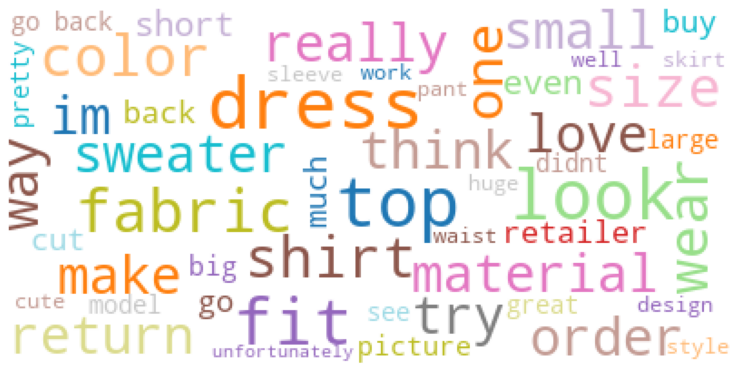

In [ ]:
wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=50,\
                      max_font_size=40, relative_scaling=.3, colormap="tab20").generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
#common words analysis

def top_n_ngram(corpus,n = None,ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis =0) 
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]

In [ ]:
common_words = top_n_ngram(complaint_df4['ReviewText3'], 20,1)
df = pd.DataFrame(common_words, columns = ['ReviewText3' , 'Count'])

fig9 = px.bar(df, x='ReviewText3', y='Count', title=f"Top 20 unigrams in reviews after treatments")
fig9.show()

In [ ]:
#Eliminate uncessary features from dataframe
complaint_df_modeldata=complaint_df4[['ReviewText3', 'ReviewText_Polarity', 'RecommendedIND']]

In [ ]:
#Control the latest dataframe that is used for prediction
complaint_df_modeldata.head()

,ReviewText3,ReviewText_Polarity,RecommendedIND
0,absolutely wonderful silky sexy comfortable,0.633333,1
1,love dress sooo pretty happen find store im gl...,0.339583,1
3,love love love jumpsuit fun flirty fabulous ev...,0.550000,1
4,shirt flatter due adjustable front tie perfect...,0.512891,1
5,love tracy reese dress one petite 5 foot tall ...,0.178750,0


## Prediction Model & Model Performance Evaluation

Train-test data split

In [ ]:
#Train, test sets split
X_train, X_test, y_train, y_test = train_test_split(complaint_df_modeldata.ReviewText3.values, 
                                                  complaint_df_modeldata.RecommendedIND.values, 
                                                  test_size=0.25, 
                                                  random_state=0, 
                                                  stratify=complaint_df4.RecommendedIND.values)

In [ ]:
X_train

array(['love shirt soft romantic flowy love material probably one soft thing great quality lightweight',
       'get tan one friend get skirt shes tiny im hip get size 6 fit us sit high waist navel small waist skirt lot movement isnt poofy seethrough retailer charm look pretty basic really flatter charm new wardrobe staple dress problem zipper back',
       'love tank soft comfortable length hit right hip hug body nicely tight loose enough hot summer day black white wish would offer color',
       ...,
       'like jean wear received compliment run large size one size probably could size two size feel tight first put wear loosen find pulling meet waist complaint small one embroider flower knee rub knee move awhile right knee felt like carpet burn give 4 star desi',
       'sweater soft comfortable perfect transition piece summer fall winter easily layer 411 little large could size extra small petite still love',
       'love color originally purchase large broad shoulder big long 54 ex

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

LOGISTIC REGRESSION

In [ ]:
logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

logreg.fit(X_train_vec,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_logreg = logreg.predict(X_test_vec)

In [ ]:
y_train_pred_proba_logreg = logreg.predict_proba(X_train_vec)
y_test_pred_proba_logreg = logreg.predict_proba(X_test_vec)

PERFORMANCE MEASUREMENTS:

In [ ]:
#ACCURACY VALUE:
acc_logreg=logreg.score(X_test_vec, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(acc_logreg))

Accuracy of logistic regression classifier on test set: 0.93


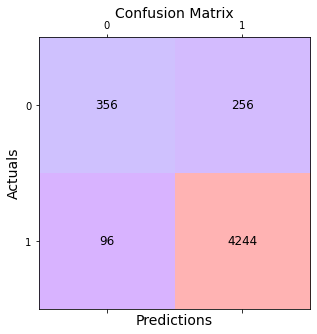

In [ ]:
# CONFUSION MATRIX
#
cnf_matrix_logreg = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_logreg)
#

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cnf_matrix_logreg, cmap=plt.cm.rainbow, alpha=0.3)
for i in range(cnf_matrix_logreg.shape[0]):
    for j in range(cnf_matrix_logreg.shape[1]):
        ax.text(x=j, y=i,s=cnf_matrix_logreg[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
#PRECISION - RECALL - F1 SCORE VALUES:
prec_logreg=metrics.precision_score(y_test, y_pred_logreg, average='macro')
rec_logreg=metrics.recall_score(y_test, y_pred_logreg, average='macro')
f1_logreg=metrics.f1_score(y_pred_logreg, y_test, average='macro')

print('Precision: %.5f' % prec_logreg)
print('Recall: %.5f' % rec_logreg)
print('F-1 Score: %.5f' % f1_logreg)

Precision: 0.86536
Recall: 0.77979
F-1 Score: 0.81468


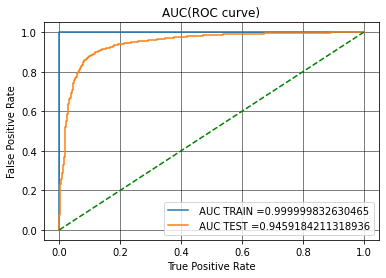

In [ ]:
#ROC CURVE ANALYSIS:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_proba_logreg[::,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_proba_logreg[::,1])

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

SUPPORT VECTOR MACHINE CLASSIFIER

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svc.fit(X_train_vec,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_svc = svc.predict(X_test_vec)

In [ ]:
y_train_pred_proba_svc = svc.decision_function(X_train_vec)    
y_test_pred_proba_svc = svc.decision_function(X_test_vec) 

In [ ]:
#ACCURACY VALUE:
acc_svc=svc.score(X_test_vec, y_test)
print('Accuracy of SVC on test set: {:.2f}'.format(acc_svc))

Accuracy of SVC on test set: 0.92


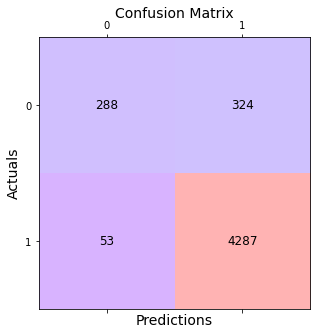

In [ ]:
# CONFUSION MATRIX
#
cnf_matrix_svc = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_svc)
#

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cnf_matrix_svc, cmap=plt.cm.rainbow, alpha=0.3)
for i in range(cnf_matrix_svc.shape[0]):
    for j in range(cnf_matrix_svc.shape[1]):
        ax.text(x=j, y=i,s=cnf_matrix_svc[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
#PRECISION - RECALL - F1 SCORE VALUES:
prec_svc=metrics.precision_score(y_test, y_pred_svc, average='macro')
rec_svc=metrics.recall_score(y_test, y_pred_svc, average='macro')
f1_svc=metrics.f1_score(y_pred_svc, y_test, average='macro')

print('Precision: %.5f' % prec_svc)
print('Recall: %.5f' % rec_svc)
print('F-1 Score: %.5f' % f1_svc)

Precision: 0.88715
Recall: 0.72919
F-1 Score: 0.78114


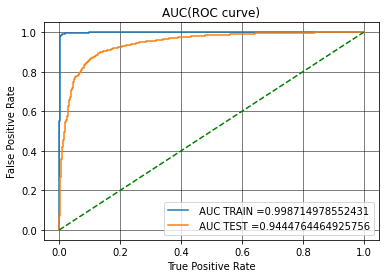

In [ ]:
#ROC CURVE ANALYSIS:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_proba_svc)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_proba_svc)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

GRADIANT BOOSTED TREE

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
max_depth=3, random_state=0)

gbt.fit(X_train_vec, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred_gbt=gbt.predict(X_test_vec)

In [ ]:
y_train_pred_proba_gbt = gbt.predict_proba(X_train_vec)
y_test_pred_proba_gbt = gbt.predict_proba(X_test_vec)

In [ ]:
#ACCURACY VALUE:
acc_gbt=gbt.score(X_test_vec, y_test)
print('Accuracy of Gradiant Boosted Tree classifier on test set: {:.2f}'.format(acc_gbt))

Accuracy of Gradiant Boosted Tree classifier on test set: 0.90


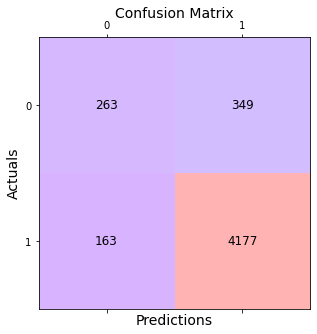

In [ ]:
# CONFUSION MATRIX
#
cnf_matrix_gbt = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_gbt)
#

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cnf_matrix_gbt, cmap=plt.cm.rainbow, alpha=0.3)
for i in range(cnf_matrix_gbt.shape[0]):
    for j in range(cnf_matrix_gbt.shape[1]):
        ax.text(x=j, y=i,s=cnf_matrix_gbt[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
#PRECISION - RECALL - F1 SCORE VALUES:
prec_gbt=metrics.precision_score(y_test, y_pred_gbt, average='macro')
rec_gbt=metrics.recall_score(y_test, y_pred_gbt, average='macro')
f1_gbt=metrics.f1_score(y_pred_gbt, y_test, average='macro')

print('Precision: %.5f' % prec_gbt)
print('Recall: %.5f' % rec_gbt)
print('F-1 Score: %.5f' % f1_gbt)

Precision: 0.77013
Recall: 0.69609
F-1 Score: 0.72450


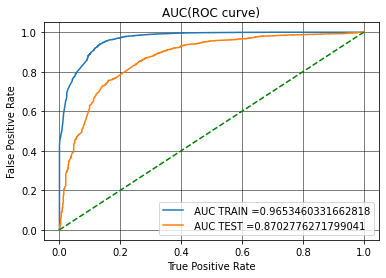

In [ ]:
#ROC CURVE ANALYSIS:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_proba_gbt[::,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_proba_gbt[::,1])

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_depth=3, random_state=0)
rf.fit(X_train_vec, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rf=rf.predict(X_test_vec)

In [ ]:
y_train_pred_proba_rf = rf.predict_proba(X_train_vec)
y_test_pred_proba_rf = rf.predict_proba(X_test_vec)

In [ ]:
#ACCURACY VALUE:
acc_rf=rf.score(X_test_vec, y_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(acc_rf))

Accuracy of Random Forest classifier on test set: 0.88


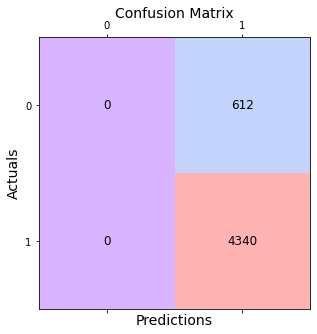

In [ ]:
# CONFUSION MATRIX

cnf_matrix_rf = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_rf)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cnf_matrix_rf, cmap=plt.cm.rainbow, alpha=0.3)
for i in range(cnf_matrix_rf.shape[0]):
    for j in range(cnf_matrix_rf.shape[1]):
        ax.text(x=j, y=i,s=cnf_matrix_rf[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
#PRECISION - RECALL - F1 SCORE VALUES:
prec_rf=metrics.precision_score(y_test, y_pred_rf, average='macro')
rec_rf=metrics.recall_score(y_test, y_pred_rf, average='macro')
f1_rf=metrics.f1_score(y_pred_rf, y_test, average='macro')

print('Precision: %.5f' % prec_rf)
print('Recall: %.5f' % rec_rf)
print('F-1 Score: %.5f' % f1_rf)

Precision: 0.43821
Recall: 0.50000
F-1 Score: 0.46707


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



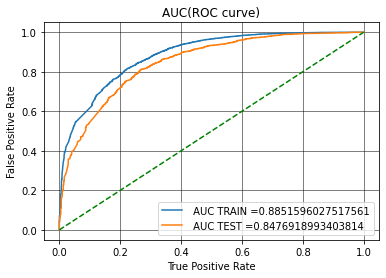

In [ ]:
#ROC CURVE ANALYSIS:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_proba_rf[::,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_proba_rf[::,1])

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [ ]:
# Model Results' Monitoring Example: 
#Review Text, Actual Recommendation Indicator and Predicted Recomendation Indicator of Built Logistic Regression Model
numpy_array1=np.c_[X_test, y_test, y_pred_logreg]

df_pred_logreg = pd.DataFrame(numpy_array1, columns=['Text', 'Ind','Pred_prob'])
df_pred_logreg

,Text,Ind,Pred_prob
0,dress hang horribly unlike photo waist cinch b...,0,1
1,really want lovebutthe way fitlower part tad f...,0,0
2,shirt amaze soft fabric detail embroidery gorg...,1,1
3,really love piece different anything else mate...,1,1
4,go store specifically try dress captivate phot...,1,0
...,...,...,...
4947,love jean color list black reason definitely b...,1,1
4948,love new top wear casually skinny navy pant dr...,1,1
4949,top run large size love besides adorable,1,1
4950,pant great 510 tall actually hair long complai...,1,1


MODEL RESULTS COMPARISON

In [ ]:
#CONCLUSION: Choosing the best of the models according to performance metrics. 
#According to results, logistic regression model is the best fit model for predicting recommendation indicator by review texts. 

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Gradiant Boosted Tree', 'Random Forest'],
    'Accuracy': [acc_logreg, acc_svc, acc_gbt,  acc_rf],
    'Precision': [prec_logreg, prec_svc, prec_gbt,  prec_rf],
    'Recall': [rec_logreg, rec_svc, rec_gbt, rec_rf],
    'F1 Score': [f1_logreg, f1_svc, f1_gbt, f1_rf]
              })
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.928918,0.865361,0.779790,0.814677
1,Support Vector Machines,0.923869,0.887154,0.729188,0.781144
2,Gradiant Boosted Tree,0.896607,0.770130,0.696090,0.724498
3,Random Forest,0.876414,0.438207,0.500000,0.467068


In [ ]:
#NEW CANDIDATE REVIEW PREDICTIONS WITH ALL PREDICTION MODELS:

test_review1 = vectorizer.transform(["I loved this classic jacket. It really suit me. I like it"])
print(logreg.predict_proba(test_review1)[::,1],
svc.decision_function(test_review1),
gbt.predict_proba(test_review1)[::,1],
rf.predict_proba(test_review1)[::,1],)

[0.92974576] [0.84932019] [0.95935782] [0.87846559]


In [ ]:
test_review2 = vectorizer.transform(["Pants are really oversized! I didnt like it. It was too big, and not appropriate with instruction. I never bought again"])
print(logreg.predict_proba(test_review2)[::,1],
svc.decision_function(test_review2),
gbt.predict_proba(test_review2)[::,1],
rf.predict_proba(test_review2)[::,1],)

[0.40499939] [0.12792943] [0.95935782] [0.8738716]


## COMMENTS AND SUGGESTIONS

Predictions are calculated as probability of recommendation of customer. If the predicted probabilty is close  to 1, it means that customer more willing to recommend the product by his/her review. If the predicted probabilty is close to 0, it means that customer is closer to not recommending the product by his/her review. As it is seen in above probabilty results, logistic regression and SVM predictors has better results on reviews to predict recommendation probabilty of customer for the product.On the other hand, it gives better idea about models to validate with use bulk unseen new review data.

*In order to get better prediction results fro given case;*

- The more feature engineering processes can be applied and review text can be strengthened by new variables.
- Dataset sample size can be increased.
- With more hyperparameter tuning and differet predictors, model that fits better to the dataset can be obtained.